In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

In [2]:
file_path = './Queries.csv'
df_queries = pd.read_csv(file_path)
df_queries

,Top queries,Clicks,Impressions,CTR,Position
0,5.11,154686,553736,27.93%,1.45
1,5.11 tactical,120652,467538,25.81%,1.07
2,511 tactical,73795,306332,24.09%,1.05
3,511,30611,542222,5.65%,4.35
4,5 11,4854,41544,11.68%,2.23
...,...,...,...,...,...
995,police patrol bag,67,890,7.53%,6.14
996,tactical gloves for shooting,67,556,12.05%,5.70
997,5.11 moab,67,488,13.73%,2.18
998,511 hats,67,484,13.84%,1.37


In [3]:
df_queries_position = df_queries.sort_values('Position', ascending=True)
df_queries_position

,Top queries,Clicks,Impressions,CTR,Position
265,5.11 hawaii,226,751,30.09%,1.00
615,5.11 gift card balance,102,125,81.6%,1.00
638,5.11 official website,98,171,57.31%,1.00
129,5.11 tactical canada,430,1898,22.66%,1.00
655,5.11 hoover,96,244,39.34%,1.00
...,...,...,...,...,...
652,military surplus near me,96,405,23.7%,36.53
489,gun belt,127,4904,2.59%,38.33
478,ifak kit,129,1800,7.17%,42.95
470,weighted vest,131,5177,2.53%,49.18


In [4]:
df_queries_CTR = df_queries.sort_values('CTR', ascending=False)
df_queries_CTR

,Top queries,Clicks,Impressions,CTR,Position
992,5.11 tactical order status,68,75,90.67%,1.00
596,bop 511,105,116,90.52%,1.33
205,511 near me,275,2801,9.82%,1.62
667,what is a grey man,94,978,9.61%,1.03
398,rifle range bag,155,1672,9.27%,3.87
...,...,...,...,...,...
567,weight vest,108,14591,0.74%,18.22
934,tactical pen,70,10506,0.67%,20.68
74,tactical,649,102034,0.64%,6.83
53,5'11,818,146660,0.56%,3.06


In [5]:
df_queries_position['CTR'] = df_queries_position['CTR'].str.rstrip('%').astype('float') / 100.0
average_position = df_queries_position['Position'].mean()
average_ctr = df_queries_position['CTR'].mean()


In [6]:
top_df_queries_CTR = df_queries_CTR.head(20)
top_df_queries_CTR['CTR'] = top_df_queries_CTR['CTR'].str.rstrip('%').astype('float') / 100.0


C:\Users\lrpay\AppData\Local\Temp\ipykernel_9396\2563490600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_df_queries_CTR['CTR'] = top_df_queries_CTR['CTR'].str.rstrip('%').astype('float') / 100.0


In [7]:
# Create a boolean mask where True indicates rows where the 'Top queries' column
# contains "5.11", "511", or "5 eleven"
mask = df_queries_CTR['Top queries'].str.contains('5.11|511|5 eleven', case=False, na=False)

# Invert the mask to keep rows where the condition is False (i.e., do not contain the strings)
df_filtered = df_queries_CTR[~mask]
df_filtered['CTR'] = df_filtered['CTR'].str.rstrip('%').astype('float') / 100.0

# df_filtered will now contain the DataFrame without the rows with "5.11", "511", or "5 eleven".
# Note: This operation is case-insensitive due to case=False. If you want it to be case-sensitive, remove that argument.
df_filtered  # Display the first few rows of the filtered DataFrame to verify


C:\Users\lrpay\AppData\Local\Temp\ipykernel_9396\1351984373.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['CTR'] = df_filtered['CTR'].str.rstrip('%').astype('float') / 100.0


,Top queries,Clicks,Impressions,CTR,Position
667,what is a grey man,94,978,0.0961,1.03
398,rifle range bag,155,1672,0.0927,3.87
703,concealed carry joggers,90,995,0.0905,6.48
641,gray man theory,97,1152,0.0842,1.90
795,concealed carry leggings,82,1001,0.0819,8.59
...,...,...,...,...,...
683,tactical flashlight,92,10069,0.0091,17.73
224,karambit knife,257,32908,0.0078,8.03
567,weight vest,108,14591,0.0074,18.22
934,tactical pen,70,10506,0.0067,20.68


In [8]:
df_Top_n_CTR = df_filtered.drop(['Clicks', 'Impressions', 'Position'], axis=1)
df_Top_n_CTR

,Top queries,CTR
667,what is a grey man,0.0961
398,rifle range bag,0.0927
703,concealed carry joggers,0.0905
641,gray man theory,0.0842
795,concealed carry leggings,0.0819
...,...,...
683,tactical flashlight,0.0091
224,karambit knife,0.0078
567,weight vest,0.0074
934,tactical pen,0.0067


In [9]:
top_df_queries_CTR_filtered = df_filtered.head(20)
top_df_queries_CTR_filtered=top_df_queries_CTR_filtered.sort_values('CTR', ascending=False)
top_df_queries_CTR_filtered

,Top queries,Clicks,Impressions,CTR,Position
969,body armor near me,69,94,0.7340,1.03
425,v.xi,147,224,0.6562,1.11
667,what is a grey man,94,978,0.0961,1.03
398,rifle range bag,155,1672,0.0927,3.87
703,concealed carry joggers,90,995,0.0905,6.48
641,gray man theory,97,1152,0.0842,1.90
795,concealed carry leggings,82,1001,0.0819,8.59
463,shooting gloves for men,134,1713,0.0782,13.88
894,police supply store near me,74,956,0.0774,9.81
781,handgun range bag,83,1077,0.0771,7.24


In [10]:
#Make your graph an interactive visiual and make 10 options named     "less than .1","more than or equal to .01 less than .02","more than or equal to .02 less than .03","more than or equal to .03 less than .04","more than or equal to .04 less than .05","more than or equal to .05 less than .06","more than or equal to .06 less than .07","more than or equal to .07 less than .08","more than or equal to .08 less than .09","more than or equal to .09 less than .1" and correctly put in the data for each drop down and have it show a graph based off what the drop down is 

In [11]:
ctr_ranges = [
    "less than .01",
    "more than or equal to .01 less than .02",
    "more than or equal to .02 less than .03",
    "more than or equal to .03 less than .04",
    "more than or equal to .04 less than .05",
    "more than or equal to .05 less than .06",
    "more than or equal to .06 less than .07",
    "more than or equal to .07 less than .08",
    "more than or equal to .08 less than .09",
    "more than or equal to .09 less than .1"
]


In [12]:
df_queries_CTR['CTR'] = df_queries_CTR['CTR'].str.rstrip('%').astype('float') / 100

# Confirm the conversion by checking the data type of the 'CTR' column
print(df_queries_CTR['CTR'].dtype)

# Optionally, view the first few rows to confirm proper formatting
df_queries_CTR.head()

float64


,Top queries,Clicks,Impressions,CTR,Position
992,5.11 tactical order status,68,75,0.9067,1.00
596,bop 511,105,116,0.9052,1.33
205,511 near me,275,2801,0.0982,1.62
667,what is a grey man,94,978,0.0961,1.03
398,rifle range bag,155,1672,0.0927,3.87


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
import re 


In [14]:
df_Top_n_CTR['CTR'] = df_Top_n_CTR['CTR'].astype(float)

# Updated filter_and_plot function
def filter_and_plot(ctr_range):
    plt.clf()

    # Regular expression adjustment to correctly extract bounds
    bounds = re.findall(r"(\d+\.\d+)", ctr_range)
    bounds = [float(b) for b in bounds]

    if 'less than' in ctr_range and bounds:
        upper_bound = bounds[0]
        filtered_data = df_Top_n_CTR[df_Top_n_CTR['CTR'] < upper_bound]
    elif 'more than or equal to' in ctr_range and len(bounds) == 2:
        lower_bound, upper_bound = bounds
        filtered_data = df_Top_n_CTR[(df_Top_n_CTR['CTR'] >= lower_bound) & (df_Top_n_CTR['CTR'] < upper_bound)]
    else:
        print(f"Error: Invalid bounds format for selected range: {ctr_range}")
        return

    if not filtered_data.empty:
        sns.barplot(x='Top queries', y='CTR', data=filtered_data, palette='viridis')
        plt.xlabel('Top queries')
        plt.ylabel('CTR')
        plt.title(f'CTR for Queries based on selected range: {ctr_range}')
        plt.xticks(rotation=45, ha='right')  # Adjusted for better label visibility
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data found for selected range: {ctr_range}")

# Dropdown widget setup
ctr_ranges = [
    "less than .01",
    "more than or equal to .01 less than .02",
    "more than or equal to .02 less than .03",
    "more than or equal to .03 less than .04",
    "more than or equal to .04 less than .05",
    "more than or equal to .05 less than .06",
    "more than or equal to .06 less than .07",
    "more than or equal to .07 less than .08",
    "more than or equal to .08 less than .09",
    "more than or equal to .09 less than .1"
]

dropdown = widgets.Dropdown(options=ctr_ranges, value='less than .01', description='CTR Range:')
widgets.interact(filter_and_plot, ctr_range=dropdown)

interactive(children=(Dropdown(description='CTR Range:', options=('less than .01', 'more than or equal to .01 …

<function __main__.filter_and_plot(ctr_range)>

In [15]:
def filter_and_plot(ctr_range):
    plt.clf()
    bounds = re.findall(r"(\d+\.\d+)", ctr_range)
    bounds = [float(b) for b in bounds]

    # Handling the "less than" case specifically
    if 'less than' in ctr_range and bounds:
        upper_bound = bounds[0]
        filtered_data = df_Top_n_CTR[df_Top_n_CTR['CTR'] < upper_bound]
    # Handling the "more than or equal to ... less than ..." case
    elif 'more than or equal to' in ctr_range and len(bounds) == 2:
        lower_bound, upper_bound = bounds
        filtered_data = df_Top_n_CTR[(df_Top_n_CTR['CTR'] >= lower_bound) & (df_Top_n_CTR['CTR'] < upper_bound)]
    else:
        print(f"No data found for selected range: {ctr_range}")
        return

    if not filtered_data.empty:
        sns.barplot(x='Top queries', y='CTR', data=filtered_data, palette='viridis')
        plt.xlabel('Top queries')
        plt.ylabel('CTR')
        plt.title(f'CTR for Queries based on selected range: {ctr_range}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data found for selected range: {ctr_range}")

# Ensure to redefine ctr_ranges if needed and re-run the widget interaction code:
widgets.interact(filter_and_plot, ctr_range=widgets.Dropdown(options=ctr_ranges, value='less than .01', description='CTR Range:'))


interactive(children=(Dropdown(description='CTR Range:', options=('less than .01', 'more than or equal to .01 …

<function __main__.filter_and_plot(ctr_range)>

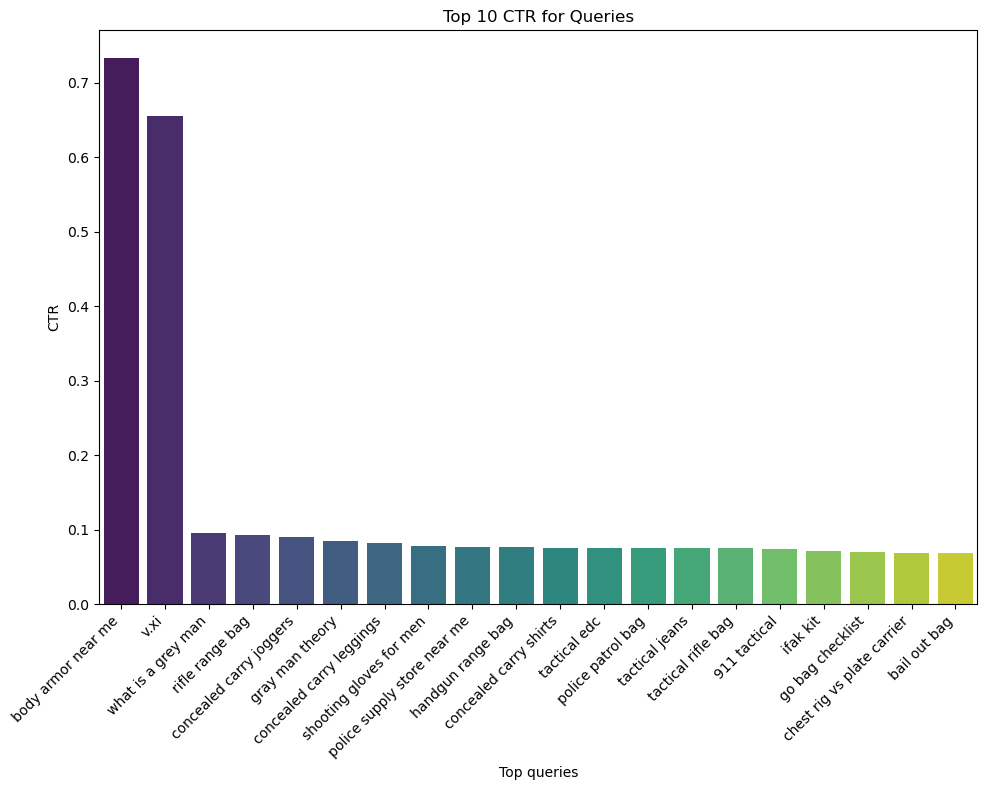

In [16]:
# Create a barplot
plt.figure(figsize=(10, 8))  # You might need to adjust this size
sns.barplot(x='Top queries', y='CTR', data=top_df_queries_CTR_filtered, palette='viridis')

# Add titles and labels
plt.xlabel('Top queries')
plt.ylabel('CTR')
plt.title('Top 10 CTR for Queries')

# Rotate and align labels
plt.xticks(rotation=45, ha='right')

# Improve layout
plt.tight_layout()

# Display the plot
plt.show()


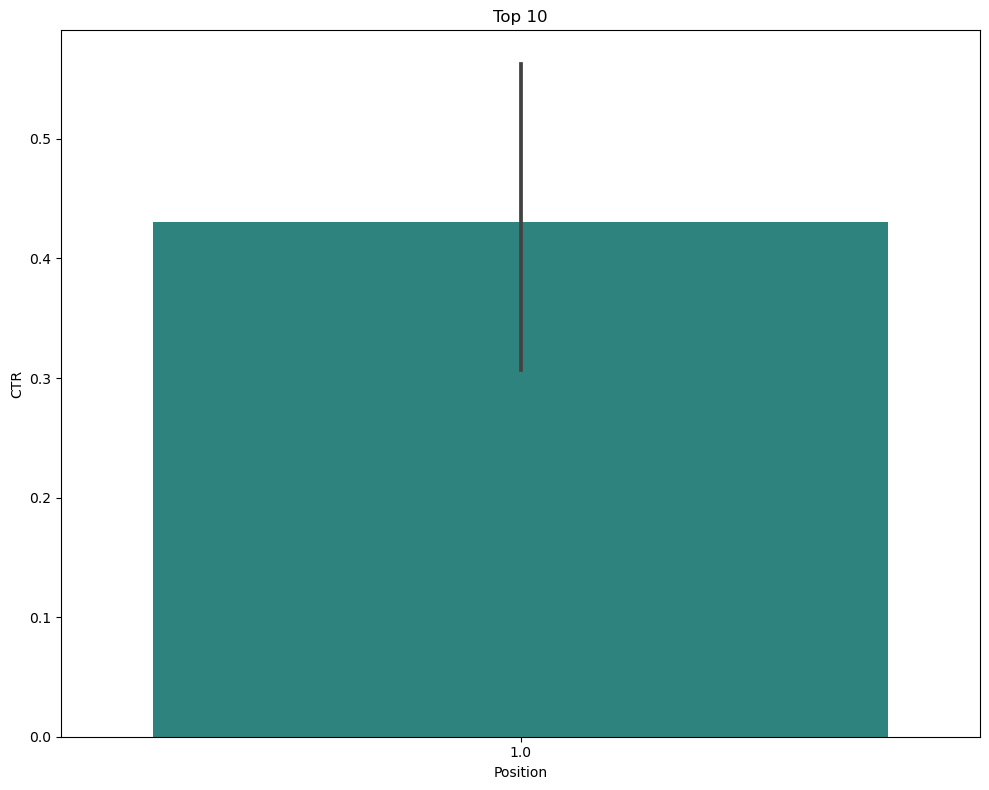

In [17]:
top_df_queries_position = df_queries_position.head(10)
# Create a barplot
plt.figure(figsize=(10, 8))
sns.barplot(x='Position', y='CTR', data=top_df_queries_position, palette='viridis')

# Add titles and labels
plt.xlabel('Position')
plt.ylabel('CTR')
plt.title('Top 10')

# Display the plot
plt.tight_layout()
plt.show()

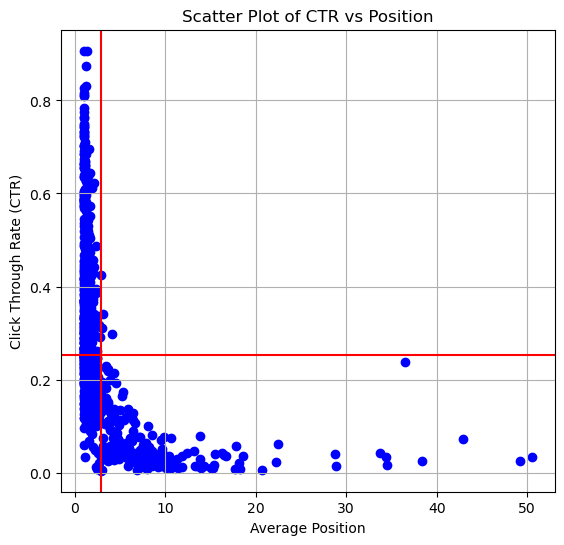

In [18]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(df_queries_position['Position'], df_queries_position['CTR'], color='blue')
plt.title('Scatter Plot of CTR vs Position')
plt.xlabel('Average Position')
plt.ylabel('Click Through Rate (CTR)')
plt.axhline(y=average_ctr, color='r', linestyle='-')
plt.axvline(x=average_position, color='r', linestyle='-')
plt.grid(True)


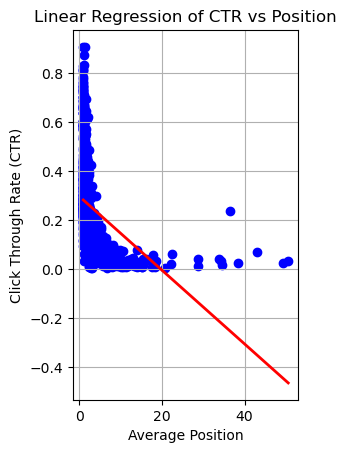

In [19]:
# Let's create the data for the regression line
X = df_queries_position['Position'].values.reshape(-1, 1)  # Features
y = df_queries_position['CTR'].values.reshape(-1, 1)  # Target variable
# Create linear regression object
regr = LinearRegression()

# Fit the linear regression model
regr.fit(X, y)

# Make predictions using the testing set
y_pred = regr.predict(X)

# Scatter plot with the linear regression line
plt.subplot(1, 2, 2)
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.title('Linear Regression of CTR vs Position')
plt.xlabel('Average Position')
plt.ylabel('Click Through Rate (CTR)')
plt.grid(True)

plt.show()


In [20]:
# Coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y, y_pred))


Coefficients: 
 [[-0.01505862]]
Mean squared error: 0.03
Coefficient of determination: 0.15


In [21]:
df_Top_n_CTR

,Top queries,CTR
667,what is a grey man,0.0961
398,rifle range bag,0.0927
703,concealed carry joggers,0.0905
641,gray man theory,0.0842
795,concealed carry leggings,0.0819
...,...,...
683,tactical flashlight,0.0091
224,karambit knife,0.0078
567,weight vest,0.0074
934,tactical pen,0.0067


,Description,Value
0,Session id,8523
1,Target,CTR
2,Target type,Regression
3,Original data shape,"(230, 2)"
4,Transformed data shape,"(230, 2)"
5,Transformed train set shape,"(161, 2)"
6,Transformed test set shape,"(69, 2)"
7,Categorical features,1
8,Preprocess,True
9,Imputation type,simple


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0569,0.0040,0.0635,-2.9308,0.0593,1.9628
1,0.1380,0.0526,0.2293,-0.2135,0.1715,1.5103
2,0.0803,0.0137,0.1172,-0.0024,0.0964,1.8489
3,0.0589,0.0058,0.0760,-0.0911,0.0676,1.9349
4,0.0667,0.0088,0.0939,-0.0141,0.0800,1.8822
5,0.0605,0.0071,0.0844,-0.0018,0.0718,0.8491
6,0.0847,0.0118,0.1087,-0.0050,0.0929,2.0913
7,0.0984,0.0126,0.1123,-0.0591,0.0969,2.0637
8,0.0866,0.0135,0.1161,-0.1060,0.0966,2.2687


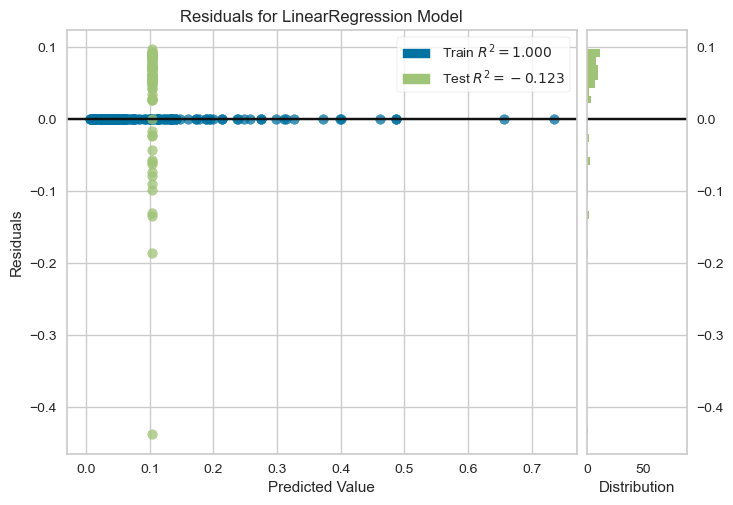

In [22]:
import pandas as pd
from pycaret.regression import *
reg1 = setup(data=df_Top_n_CTR, target='CTR')

# Create a regression model, using Linear Regression ('lr') in this example
lr = create_model('lr')

# Plot model performance, for regression 'auc' is not applicable, use 'residuals' or other relevant plots
plot_model(lr, plot='residuals')

In [23]:
file_path1 = './no511.csv'
df_no_511 = pd.read_csv(file_path1)
df_no_511

,Top queries,CTR
0,what is a grey man,0.0961
1,rifle range bag,0.0927
2,concealed carry joggers,0.0905
3,gray man theory,0.0842
4,concealed carry leggings,0.0819
...,...,...
210,tactical flashlight,0.0091
211,karambit knife,0.0078
212,weight vest,0.0074
213,tactical pen,0.0067


In [24]:
file_path2 = './dont use Pages.csv'
df_pages = pd.read_csv(file_path2)
df_pages_sorted = df_pages.sort_values('Position', ascending=True)
df_pages_sorted

,Top pages,Clicks,Impressions,CTR,Position
94,https://www.511tactical.com/mens/shop-all.html,1161,737510,0.16%,1.56
31,https://www.511tactical.com/sale/mens.html,3627,1292652,0.28%,1.71
623,https://www.511tactical.com/de-de/outlet.html,196,40594,0.48%,1.84
267,https://www.511tactical.com/v-xi-sigurd-shirt....,496,2732,18.16%,2.12
25,https://www.511tactical.com/womens.html,3861,1540322,0.25%,2.27
...,...,...,...,...,...
396,https://www.511tactical.com/mens/mens-pants/me...,343,36557,0.94%,62.00
180,https://www.511tactical.com/mens/mens-shirts/b...,726,158246,0.46%,63.69
453,https://www.511tactical.com/mens/mens-outerwea...,299,29155,1.03%,65.03
892,https://www.511tactical.com/fr-utility-stretch...,118,4697,2.51%,65.44


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, Dropdown
import plotly.express as px

# Assuming df_pages_sorted is already defined and available in the environment.

# Generate a function to filter the dataframe based on the position range and create an interactive plot.
def plot_position_range(range_selection):
    if range_selection == '0-25':
        df_filtered = df_pages_sorted[(df_pages_sorted['Position'] >= 0) & (df_pages_sorted['Position'] <= 25)]
    elif range_selection == '25-50':
        df_filtered = df_pages_sorted[(df_pages_sorted['Position'] > 25) & (df_pages_sorted['Position'] <= 50)]
    elif range_selection == '50-75':
        df_filtered = df_pages_sorted[(df_pages_sorted['Position'] > 50) & (df_pages_sorted['Position'] <= 75)]
    else: 
        df_filtered = df_pages_sorted[(df_pages_sorted['Position'] > 75) & (df_pages_sorted['Position'] <= 100)]

    fig = px.scatter(df_filtered, x='Position', y='CTR', hover_data=['Top pages'], title=f'CTR vs Position for range {range_selection}')
    fig.update_traces(textposition='top center')
    fig.update_layout(showlegend=False)
    fig.show()
    filename = f'CTR_vs_Position_{range_selection}.html'
    fig.write_html(filename)
    print(f'Plot saved as {filename}')
# Dropdown widget for the position ranges.
dropdown = Dropdown(options=['0-25', '25-50', '50-75', '75-100'], value='0-25', description='Position Range')

# The interactive widget.
interact(plot_position_range, range_selection=dropdown)


interactive(children=(Dropdown(description='Position Range', options=('0-25', '25-50', '50-75', '75-100'), val…

<function __main__.plot_position_range(range_selection)>

In [26]:
file_path3 = './menvswomen.csv'
df_pages = pd.read_csv(file_path2)
df_pages_sorted = df_pages.sort_values('CTR', ascending=True)
df_pages_sorted

,Top pages,Clicks,Impressions,CTR,Position
716,https://www.511tactical.com/5-11-a-t-8-arid.html,166,234721,0.07%,7.77
385,https://www.511tactical.com/accessories.html,351,289347,0.12%,8.54
368,https://www.511tactical.com/5-11-a-t-6-non-zip...,369,289210,0.13%,7.40
281,https://www.511tactical.com/511-tactical-shirt...,486,378678,0.13%,7.97
264,https://www.511tactical.com/company-info/about...,497,342046,0.15%,4.29
...,...,...,...,...,...
903,https://www.511tactical.com/daily-deploy-48-pa...,117,1214,9.64%,8.12
765,https://www.511tactical.com/mens-ls-pdu-rapid-...,151,1556,9.7%,9.24
793,https://www.511tactical.com/club-ruck-tee.html,143,1469,9.73%,4.54
944,https://www.511tactical.com/goal-pt-r-jogger.html,110,1125,9.78%,6.81


In [27]:
filtered_df1 = df_pages_sorted[df_pages_sorted['Top pages'].str.startswith('https://www.511tactical.com/mens/')]
filtered_df2 = df_pages_sorted[df_pages_sorted['Top pages'].str.startswith('https://www.511tactical.com/womens/')]

# Display the filtered DataFrame
print(filtered_df1)


                                             Top pages  Clicks  Impressions  \
94      https://www.511tactical.com/mens/shop-all.html    1161       737510   
696  https://www.511tactical.com/mens/bags-packs/ba...     174        50474   
678  https://www.511tactical.com/mens/mens-training...     180        47302   
585   https://www.511tactical.com/mens/bags-packs.html     219        55805   
180  https://www.511tactical.com/mens/mens-shirts/b...     726       158246   
318     https://www.511tactical.com/mens/footwear.html     424        62280   
191  https://www.511tactical.com/mens/footwear/boot...     695       100472   
396  https://www.511tactical.com/mens/mens-pants/me...     343        36557   
48   https://www.511tactical.com/mens/mens-pants/me...    2354       236771   
453  https://www.511tactical.com/mens/mens-outerwea...     299        29155   
120  https://www.511tactical.com/mens/mens-shorts.html     992        93875   
713  https://www.511tactical.com/mens/big-tall-clot.

In [28]:
# Display the filtered DataFrame
print(filtered_df2)


                                             Top pages  Clicks  Impressions  \
675  https://www.511tactical.com/womens/womens-pant...     182        70337   
925  https://www.511tactical.com/womens/womens-shor...     112        20868   
724  https://www.511tactical.com/womens/womens-shir...     163        21553   
336  https://www.511tactical.com/womens/womens-oute...     402        44613   
886  https://www.511tactical.com/womens/plus-size-c...     119        11550   
403  https://www.511tactical.com/womens/womens-pant...     332        30785   
143   https://www.511tactical.com/womens/footwear.html     860        63918   
40   https://www.511tactical.com/womens/womens-pant...    2829       202415   
596  https://www.511tactical.com/womens/bags-and-pa...     211        14016   
258  https://www.511tactical.com/womens/womens-pant...     508        15123   

       CTR  Position  
675  0.26%     44.30  
925  0.54%     59.83  
724  0.76%     51.77  
336   0.9%      8.92  
886  1.03%     

In [29]:
# Sum the "Clicks" and "Impressions" columns for the filtered DataFrame
total_clicks_women = filtered_df2['Clicks'].sum()
total_impressions_women = filtered_df2['Impressions'].sum()

print("Total Clicks for URLs starting with https://www.511tactical.com/womens/:", total_clicks_women)
print("Total Impressions for URLs starting with https://www.511tactical.com/womens/:", total_impressions_women)
ctr_women = total_clicks_women / total_impressions_women
ctr_women_percentage = ctr_women * 100
print("CTR for URLs starting with https://www.511tactical.com/womens/: {:.2f}%".format(ctr_women_percentage))


Total Clicks for URLs starting with https://www.511tactical.com/womens/: 5718
Total Impressions for URLs starting with https://www.511tactical.com/womens/: 495178
CTR for URLs starting with https://www.511tactical.com/womens/: 1.15%


In [30]:
# Sum the "Clicks" and "Impressions" columns for the filtered DataFrame
total_clicks_men = filtered_df1['Clicks'].sum()
total_impressions_men = filtered_df1['Impressions'].sum()

print("Total Clicks for URLs starting with https://www.511tactical.com/mens/:", total_clicks_men)
print("Total Impressions for URLs starting with https://www.511tactical.com/mens/:", total_impressions_men)
# Calculate the Click-Through Rate (CTR)
ctr_men = total_clicks_men / total_impressions_men

ctr_men_percentage = ctr_men * 100
print("CTR for URLs starting with https://www.511tactical.com/mens/: {:.2f}%".format(ctr_men_percentage))

Total Clicks for URLs starting with https://www.511tactical.com/mens/: 61398
Total Impressions for URLs starting with https://www.511tactical.com/mens/: 5140656
CTR for URLs starting with https://www.511tactical.com/mens/: 1.19%


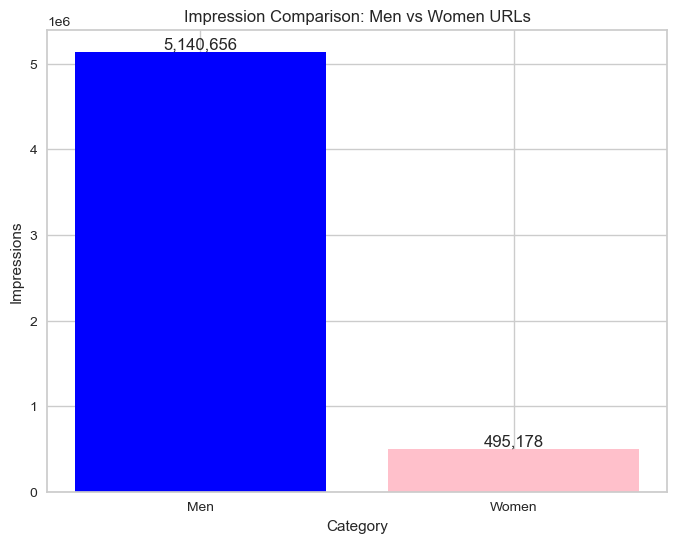

In [31]:
import matplotlib.pyplot as plt

categories = ['Men', 'Women']
impression_values = [total_impressions_men, total_impressions_women]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, impression_values, color=['blue', 'pink'])
plt.xlabel('Category')
plt.ylabel('Impressions')
plt.title('Impression Comparison: Men vs Women URLs')

# Annotate bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', ha='center', va='bottom')

plt.show()



In [32]:
dif = total_impressions_men / total_impressions_women
dif

10.381430515895294

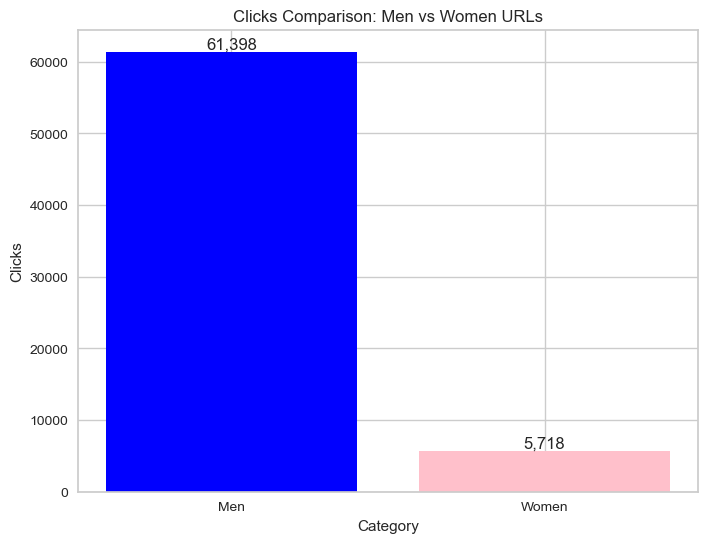

In [33]:
import matplotlib.pyplot as plt

categories = ['Men', 'Women']
impression_values = [total_clicks_men, total_clicks_women]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, impression_values, color=['blue', 'pink'])
plt.xlabel('Category')
plt.ylabel('Clicks')
plt.title('Clicks Comparison: Men vs Women URLs')

# Annotate bars with their values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,}', ha='center', va='bottom')

plt.show()

In [34]:
diff = total_clicks_men / total_clicks_women
diff

10.737670514165792

In [35]:
#find the average for postion and ctr then show a graph one with linear regress and the other without
#drop anything with 5.11
#also look at data for 5.11

In [36]:
# Import necessary libraries
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd


In [42]:
import dash
from dash import html, dcc
import plotly.express as px
from dash.dependencies import Input, Output
import pandas as pd

# Assuming df_pages_sorted is your dataframe and it's already available here
df_no_5111 = df_no_511.sort_values('CTR', ascending=False)

app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1(children='URL Performance Dashboard'),

    # Dropdown for CTR Comparison
    html.Div([
        dcc.Graph(
            id='ctr-comparison-chart',
            figure=px.bar(df_no_5111, x='Top queries', y='CTR', title='CTR Comparison')
        )
    ]),
    
    # Dropdown for Position Range Selection
    html.Div([
        dcc.Dropdown(
            id='position-range-dropdown',
            options=[
                {'label': '0-25', 'value': '0-25'},
                {'label': '25-50', 'value': '25-50'},
                {'label': '50-75', 'value': '50-75'},
                {'label': '75-100', 'value': '75-100'}
            ],
            value='0-25'
        ),
        dcc.Graph(id='position-ctr-graph')
    ])
])

# Callback to update the Position vs CTR graph based on dropdown selection
@app.callback(
    Output('position-ctr-graph', 'figure'),
    [Input('position-range-dropdown', 'value')]
)
def update_graph(selected_range):
    # Parse the selected range to determine bounds
    low, high = [int(x) for x in selected_range.split('-')]
    df_filtered = df_pages_sorted[(df_pages_sorted['Position'] >= low) & (df_pages_sorted['Position'] < high)]

    # Create the figure for the filtered dataframe
    fig = px.scatter(df_filtered, x='Position', y='CTR', hover_data=['Top pages'])
    return fig

# Customize the index template
app.index_string = '''
<!DOCTYPE html>
<html>
    <head>
        <title>URL Performance Dashboard</title>
        <!-- Include Plotly.js -->
        <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
    </head>
    <body>
        <!-- Dash App Content -->
        {%app_entry%}
        <footer>
            <!-- Dash App Callbacks -->
            {%config%}
            {%scripts%}
            {%renderer%}
        </footer>
    </body>
</html>
'''

# Run the app
#if __name__ == '__main__':
   # app.run_server(debug=True)


In [43]:
fig1 = px.bar(df_no_5111, x='Top queries', y='CTR', title='CTR Comparison')
fig2 = px.scatter(df_filtered, x='Position', y='CTR', hover_data=['Top queries'])

# Export figures to HTML files
fig1.write_html('ctr_comparison_chart.html')
fig2.write_html('position_ctr_graph.html')

In [45]:
import dash
from dash import html, dcc
import plotly.express as px
from dash.dependencies import Input, Output
import pandas as pd

# Assuming df_pages_sorted is your dataframe and it's already available here
df_no_5111 = df_no_511.sort_values('CTR', ascending=False)

app = dash.Dash(__name__)

# Define the layout of the app
app.layout = html.Div([
    html.H1(children='URL Performance Dashboard'),

    # Dropdown for CTR Comparison
    html.Div([
        dcc.Graph(
            id='ctr-comparison-chart',
            figure=px.bar(df_no_5111, x='Top queries', y='CTR', title='CTR Comparison')
        )
    ]),
    
    # Dropdown for Position Range Selection
    html.Div([
        dcc.Dropdown(
            id='position-range-dropdown',
            options=[
                {'label': '0-25', 'value': '0-25'},
                {'label': '25-50', 'value': '25-50'},
                {'label': '50-75', 'value': '50-75'},
                {'label': '75-100', 'value': '75-100'}
            ],
            value='0-25'
        ),
        dcc.Graph(id='position-ctr-graph')
    ])
])

# Callback to update the Position vs CTR graph based on dropdown selection
@app.callback(
    Output('position-ctr-graph', 'figure'),
    [Input('position-range-dropdown', 'value')]
)
def update_graph(selected_range):
    # Parse the selected range to determine bounds
    low, high = [int(x) for x in selected_range.split('-')]
    df_filtered = df_pages_sorted[(df_pages_sorted['Position'] >= low) & (df_pages_sorted['Position'] < high)]

    # Create the figure for the filtered dataframe
    fig = px.scatter(df_filtered, x='Position', y='CTR', hover_data=['Top pages'], title=f'CTR vs Position for range {selected_range}')
    return fig

# Run the app
#if __name__ == '__main__':
 #   app.run_server(debug=True)


In [ ]:
# Combine filtered_df1 and filtered_df2
combined_df = pd.concat([filtered_df1, filtered_df2])

# Export the combined DataFrame to a CSV file
combined_df.to_csv('combined_pages_data.csv', index=False)

print("Combined DataFrame exported to 'combined_pages_data.csv'.")


Combined DataFrame exported to 'combined_pages_data.csv'.


In [ ]:
file_path9 = './combined_pages_data.csv'
df_combined = pd.read_csv(file_path9)
df_combined

,Top pages,Clicks,Impressions,CTR,Position
0,https://www.511tactical.com/mens/shop-all.html,1161,737510,0.16%,1.56
1,https://www.511tactical.com/mens/bags-packs/ba...,174,50474,0.34%,7.65
2,https://www.511tactical.com/mens/mens-training...,180,47302,0.38%,54.70
3,https://www.511tactical.com/mens/bags-packs.html,219,55805,0.39%,12.62
4,https://www.511tactical.com/mens/mens-shirts/b...,726,158246,0.46%,63.69
5,https://www.511tactical.com/mens/footwear.html,424,62280,0.68%,6.50
6,https://www.511tactical.com/mens/footwear/boot...,695,100472,0.69%,26.37
7,https://www.511tactical.com/mens/mens-pants/me...,343,36557,0.94%,62.00
8,https://www.511tactical.com/mens/mens-pants/me...,2354,236771,0.99%,48.25
9,https://www.511tactical.com/mens/mens-outerwea...,299,29155,1.03%,65.03


In [ ]:
import sweetviz as sv


# Generate the report
#report = sv.analyze(df_pages_sorted)

df_mens = df_combined[df_combined['Top pages'].str.contains('https://www.511tactical.com/mens/')]
df_womens = df_combined[df_combined['Top pages'].str.contains('https://www.511tactical.com/womens/')]

report = sv.compare_intra(df_combined, df_combined['Top pages'].str.contains('https://www.511tactical.com/mens/'), ['Mens', 'Womens'])

# To generate and show the report
report.show_html('comparison_report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
df_pages_sorted

,Top pages,Clicks,Impressions,CTR,Position
716,https://www.511tactical.com/5-11-a-t-8-arid.html,166,234721,0.07%,7.77
385,https://www.511tactical.com/accessories.html,351,289347,0.12%,8.54
368,https://www.511tactical.com/5-11-a-t-6-non-zip...,369,289210,0.13%,7.40
281,https://www.511tactical.com/511-tactical-shirt...,486,378678,0.13%,7.97
264,https://www.511tactical.com/company-info/about...,497,342046,0.15%,4.29
...,...,...,...,...,...
903,https://www.511tactical.com/daily-deploy-48-pa...,117,1214,9.64%,8.12
765,https://www.511tactical.com/mens-ls-pdu-rapid-...,151,1556,9.7%,9.24
793,https://www.511tactical.com/club-ruck-tee.html,143,1469,9.73%,4.54
944,https://www.511tactical.com/goal-pt-r-jogger.html,110,1125,9.78%,6.81


In [ ]:
file_path10 = './Search appearance.csv'
df_search = pd.read_csv(file_path10)
df_search

,Search Appearance,Clicks,Impressions,CTR,Position
0,Product snippets,328506,10290529,3.19%,27.01
1,Merchant listings,21281,331293,6.42%,9.28
2,Review snippet,11527,130469,8.84%,16.52
3,Translated results,25,1529,1.64%,10.99
